In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the datasets and storing them in dataframes

customers = pd.read_csv('/content/customer_info.csv')

products = pd.read_csv('/content/product_info.csv')

sales = pd.read_csv('/content/sales_data.csv')

**Customers**

In [3]:
customers.shape

(500, 6)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [5]:
customers.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [6]:
customers[customers['customer_id'].isnull()]

,customer_id,email,signup_date,gender,region,loyalty_tier
253,NaN,mark16@parker.com,22-02-25,femle,South,bronze
371,NaN,ohayes@gmail.com,09-12-24,Other,Central,Silver
470,NaN,nancygonzalez@wright.com,27-06-25,Male,Central,Silver


In [7]:
# replacing the null/missing values in the customer id attribute

customers.loc[[253, 371, 470], 'customer_id'] = ['C00254', 'C00372', 'C00471']

In [8]:
customers['customer_id'].isnull().sum()

np.int64(0)

In [9]:
# filling the null values in the email with 'unknown'

customers['email'] = customers['email'].fillna('unknown')

In [10]:
# filling the null values in the date column with most repeated date in that column

customers['signup_date'] = customers['signup_date'].fillna(customers['signup_date'].mode()[0])

In [11]:
customers['gender'].value_counts()

,count
gender,
femle,92
male,88
FEMALE,85
Male,81
Other,77
Female,73


In [12]:
# standardising the values in the gender column

customers['gender'] = customers['gender'].replace({'FEMALE': 'Female', 'male': 'Male', 'femle' : 'Female'})

In [13]:
# filling the null values in the gender column with most repeated date in that column

customers['gender'] = customers['gender'].fillna(customers['gender'].mode()[0])

In [14]:
customers['gender'].value_counts()

,count
gender,
Female,254
Male,169
Other,77


In [15]:
customers['region'].value_counts()

,count
region,
East,103
North,101
West,100
South,99
Central,94


In [16]:
# filling the null values in the region column with most repeated date in that column

customers['region'] = customers['region'].fillna(customers['region'].mode()[0])

In [17]:
customers['loyalty_tier'].unique()

array(['Silver', ' gold ', 'GOLD', 'bronze', 'gld', nan, 'brnze',
       'sllver'], dtype=object)

In [18]:
customers['loyalty_tier'].value_counts()

,count
loyalty_tier,
GOLD,149
Silver,118
gold,114
bronze,112
gld,2
brnze,2
sllver,1


In [19]:
# standardising the values in the loyalty_tier column

customers['loyalty_tier'] = customers['loyalty_tier'].\
                            replace({'GOLD': 'Gold', ' gold ': 'Gold', 'gld' : 'Gold'\
                            ,'sllver' : 'Silver', 'brnze' : 'Bronze', 'bronze' : 'Bronze'})

In [20]:
customers['loyalty_tier'].value_counts()

,count
loyalty_tier,
Gold,265
Silver,119
Bronze,114


In [21]:
  # filling the null values in the loyalty_tier column with most repeated date in that column

customers['loyalty_tier'] = customers['loyalty_tier'].fillna(customers['loyalty_tier'].mode()[0])

In [22]:
customers['signup_date'] = pd.to_datetime(customers['signup_date'], format='%d-%m-%y')

In [23]:
customers.rename(columns={
    'region': 'customer_region'
}, inplace=True)

In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      500 non-null    object        
 1   email            500 non-null    object        
 2   signup_date      500 non-null    datetime64[ns]
 3   gender           500 non-null    object        
 4   customer_region  500 non-null    object        
 5   loyalty_tier     500 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 23.6+ KB


**Products**

In [25]:
products.shape

(30, 6)

In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [27]:
products.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [28]:
products['launch_date'] = pd.to_datetime(products['launch_date'], format='%d-%m-%y')

In [29]:
# count of products in each category

products.groupby('category').size().reset_index(name='product_count')

,category,product_count
0,Cleaning,12
1,Kitchen,4
2,Outdoors,5
3,Personal Care,3
4,Storage,6


In [30]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     object        
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ KB


**Sales**

In [31]:
sales.shape

(3000, 10)

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [33]:
sales.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


In [34]:
sales[sales['order_id'].isna()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
862,NaN,C00237,P0013,1,39.26,06-07-25,Delayed,Credit Card,West,0.2


In [35]:
sales[sales['customer_id'].isna()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
851,O663482,NaN,P0029,3,18.89,06-07-25,Cancelled,PayPal,West,0.05
1707,O735004,NaN,P0017,2,12.18,06-07-25,delivered,Bank Transfer,Central,NaN


In [36]:
sales[sales['product_id'].isna()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
569,O711887,C00125,NaN,5,36.65,06-07-25,Cancelled,Bank Transfer,South,0.15
613,O231318,C00251,NaN,5,47.51,06-07-25,Delivered,PayPal,West,0.20
1267,O327646,C00451,NaN,4,29.16,06-07-25,Delayed,credit card,West,0.15
1841,O218065,C00324,NaN,5,25.61,06-07-25,Delayed,PayPal,North,0.20
2803,O140946,C00251,NaN,3,22.20,06-07-25,Delivered,PayPal,East,0.05


In [37]:
# dropping the rows where order id, customer id and product id are null

sales = sales.dropna(subset=['order_id', 'customer_id', 'product_id'])

In [38]:
sales['quantity'].value_counts()

,count
quantity,
2,634
5,602
3,596
4,581
1,574
three,1
five,1


In [39]:
sales['quantity'] = sales['quantity'].replace({'three': 3, 'five': 5})

In [40]:
sales[sales['quantity'].isnull()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
1113,O718743,C00209,P0024,NaN,43.59,06-07-25,Delivered,credit card,Central,0.0
1712,O490113,C00286,P0010,NaN,13.49,06-07-25,DELAYED,Bank Transfer,South,0.2
2223,O189925,C00098,P0013,NaN,46.37,06-07-25,Delivered,Bank Transfer,South,NaN


In [41]:
sales['quantity'] = sales['quantity'].fillna(sales['quantity'].median())

In [42]:
sales['quantity'] = sales['quantity'].astype(float)

In [43]:
sales[sales['unit_price'].isnull()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
496,O837867,C00350,P0028,4.0,NaN,06-07-25,delivered,Credit Card,East,0.15


In [44]:
sales['unit_price'] = sales['unit_price'].fillna(sales['unit_price'].median())

In [45]:
sales['order_date'].unique()

array(['06-07-25', nan], dtype=object)

In [46]:
sales['order_date'] = sales['order_date'].fillna('06-07-25')

In [47]:
sales['delivery_status'].unique()

array(['Delivered', ' DELAYED', 'delivered', ' Cancelled ', 'Delayed',
       'delrd', 'delyd', nan], dtype=object)

In [48]:
sales['delivery_status'] = sales['delivery_status'].replace({'delivered': 'Delivered', 'delrd': 'Delivered'\
                             ,' DELAYED' : 'Delayed', 'delyd' : 'Delayed', ' Cancelled ' : 'Cancelled' })

In [49]:
sales['delivery_status'].isnull().sum()

np.int64(3)

In [50]:
sales['delivery_status'] = sales['delivery_status'].fillna(sales['delivery_status'].mode()[0])

In [51]:
sales['payment_method'].unique()

array(['PayPal', 'credit card', 'Bank Transfer', 'Credit Card', nan,
       'bank transfr'], dtype=object)

In [52]:
sales['payment_method'] = sales['payment_method'].replace({'bank transfr': 'Bank Transfer'\
                             ,' credit card' : 'Credit Card'})

In [53]:
sales['payment_method'].isnull().sum()

np.int64(3)

In [54]:
sales['payment_method'] = sales['payment_method'].fillna(sales['payment_method'].mode()[0])

In [55]:
sales['region'].unique()

array(['Central', 'North', 'West', 'East', 'South', 'nrth'], dtype=object)

In [56]:
sales['region'] = sales['region'].replace({'nrth': 'North'})

In [57]:
sales['region'].isnull().sum()

np.int64(0)

In [58]:
sales['discount_applied'].value_counts()

,count
discount_applied,
0.15,508
0.10,506
0.05,503
0.20,480
0.00,479


In [59]:
sales['discount_applied'].isnull().sum()

np.int64(516)

In [60]:
sales['discount_applied'] = sales['discount_applied'].fillna(0.0)

In [61]:
sales['discount_applied'].value_counts()

,count
discount_applied,
0.00,995
0.15,508
0.10,506
0.05,503
0.20,480


In [62]:
# duplicated order id records

sales = sales.drop_duplicates(subset='order_id')

In [63]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%y')

In [64]:
sales.rename(columns={
    'region': 'sale_region'
}, inplace=True)

In [65]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2990 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2990 non-null   object        
 3   quantity          2990 non-null   float64       
 4   unit_price        2990 non-null   float64       
 5   order_date        2990 non-null   datetime64[ns]
 6   delivery_status   2990 non-null   object        
 7   payment_method    2990 non-null   object        
 8   sale_region       2990 non-null   object        
 9   discount_applied  2990 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 257.0+ KB


**Merging the Data**

In [66]:
merged_product = pd.merge(sales, products, how='left', on='product_id')

In [67]:
merged_df = pd.merge(merged_product, customers, how='left', on='customer_id')

In [68]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,credit card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2990 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2990 non-null   object        
 3   quantity          2990 non-null   float64       
 4   unit_price        2990 non-null   float64       
 5   order_date        2990 non-null   datetime64[ns]
 6   delivery_status   2990 non-null   object        
 7   payment_method    2990 non-null   object        
 8   sale_region       2990 non-null   object        
 9   discount_applied  2990 non-null   float64       
 10  product_name      2990 non-null   object        
 11  category          2990 non-null   object        
 12  launch_date       2990 non-null   datetime64[ns]
 13  base_price        2990 non-null   float64       
 14  supplier_code     2990 n

In [70]:
merged_df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
quantity,0
unit_price,0
order_date,0
delivery_status,0
payment_method,0
sale_region,0
discount_applied,0


In [71]:
# creating revenue attribute

merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

In [72]:
merged_df['revenue'] = merged_df['revenue'].round(2)

In [73]:
# creating order year attribute

merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [74]:
def price_band(x):
    if x < 15:
        return 'Low'
    elif x <= 30:
        return 'Medium'
    else:
        return 'High'

In [75]:
# creating price band based on unit price

merged_df['price_band'] = merged_df['unit_price'].apply(price_band)

In [76]:
merged_df['price_band'].value_counts()

,count
price_band,
High,1388
Medium,1112
Low,490


In [77]:
# Days between launch date and order date

merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [78]:
# extracting the domain name of email

merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]

In [79]:
# Creating a boolean column if delivery is delayed

merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: x == 'Delayed')

In [80]:
# creating boolean column for same region customers

merged_df['same_region'] = merged_df['customer_region'] == merged_df['sale_region']

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27,High,275,mills-logan.com,False,False
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,credit card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.60,27,Medium,169,morgan.com,True,True
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,27,Medium,103,walters-smith.com,False,False
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,27,High,356,gmail.com,False,True
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.10,27,High,136,hotmail.com,True,False


**Summary**

In [83]:
# weekly revenue trends by region

merged_df.groupby(['sale_region', 'order_week'])['revenue'].sum().reset_index()

,sale_region,order_week,revenue
0,Central,27,47575.17
1,East,27,48153.20
2,North,27,46778.46
3,South,27,49732.13
4,West,27,47729.74


In [84]:
# Product category performance by revenue

merged_df.groupby('category')['revenue'].agg(['sum', 'mean', 'min', 'max']).round(2).reset_index()

,category,sum,mean,min,max
0,Cleaning,93814.86,77.98,6.96,248.30
1,Kitchen,33933.66,84.41,7.76,249.15
2,Outdoors,40159.47,79.21,6.80,247.55
3,Personal Care,24892.25,82.70,7.50,248.10
4,Storage,47168.46,81.75,7.75,249.35


In [85]:
# Product category performance by quantity

merged_df.groupby('category')['quantity'].agg(['sum', 'mean', 'min', 'max']).round(2).reset_index()

,category,sum,mean,min,max
0,Cleaning,3591.0,2.99,1.0,5.0
1,Kitchen,1226.0,3.05,1.0,5.0
2,Outdoors,1523.0,3.00,1.0,5.0
3,Personal Care,900.0,2.99,1.0,5.0
4,Storage,1736.0,3.01,1.0,5.0


In [86]:
# Product category performance by discount applied

merged_df.groupby('category')['discount_applied'].agg(['mean', 'min', 'max']).round(2).reset_index()

,category,mean,min,max
0,Cleaning,0.09,0.0,0.2
1,Kitchen,0.08,0.0,0.2
2,Outdoors,0.08,0.0,0.2
3,Personal Care,0.09,0.0,0.2
4,Storage,0.08,0.0,0.2


In [129]:
merged_df['days_to_order'].max()

356

In [130]:
merged_df['days_to_order'].min()

19

In [87]:
# Weekly customer acquisition

merged_df.groupby( merged_df['signup_date'].dt.to_period('W').astype(str)).size()\
         .reset_index(name='customer_count').rename(columns={'signup_date': 'signup_week'})\
         .sort_values(by='customer_count', ascending=False)

,signup_week,customer_count
5,2024-08-05/2024-08-11,135
13,2024-09-30/2024-10-06,97
31,2025-02-03/2025-02-09,95
33,2025-02-17/2025-02-23,89
17,2024-10-28/2024-11-03,88
36,2025-03-10/2025-03-16,87
32,2025-02-10/2025-02-16,84
26,2024-12-30/2025-01-05,83
45,2025-05-12/2025-05-18,76
12,2024-09-23/2024-09-29,73


In [88]:
# delivery performance by region and price band

pd.pivot_table(
    merged_df,
    index='customer_region',
    columns=['price_band', 'delivery_status'],
    values='order_id',
    aggfunc='count',
    fill_value=0
)

price_band           High                         Low                    \
delivery_status Cancelled Delayed Delivered Cancelled Delayed Delivered   
customer_region                                                           
Central                37     104       109        22      36        37   
East                   55     110       133        22      33        46   
North                  60     116       123        13      43        41   
South                  52      99        97        28      41        27   
West                   58     116       119        23      34        44   

price_band         Medium                    
delivery_status Cancelled Delayed Delivered  
customer_region                              
Central                51      92        86  
East                   38      72       109  
North                  36      77        94  
South                  45      92        95  
West                   49     104        72

In [89]:
# Preferred payment methods by loyalty_tier

merged_df.groupby('loyalty_tier')['payment_method'].value_counts().unstack()

payment_method,Bank Transfer,Credit Card,PayPal,credit card
loyalty_tier,,,,
Bronze,180,154,164,133
Gold,406,427,429,419
Silver,195,153,165,165


In [90]:
# lets check how many coustomers are from same sale region and not

merged_df.groupby('same_region').size().reset_index(name='customer_count')

,same_region,customer_count
0,False,2404
1,True,586


In [91]:
# total orders by each category

merged_df['category'].value_counts()

,count
category,
Cleaning,1203
Storage,577
Outdoors,507
Kitchen,402
Personal Care,301


In [92]:
# category purchased in each region

pd.pivot_table(
    merged_df,
    index='customer_region',
    columns=['category'],
    values='order_id',
    aggfunc='count',
    fill_value=0
)

category,Cleaning,Kitchen,Outdoors,Personal Care,Storage
customer_region,,,,,
Central,215,74,109,51,125
East,271,79,89,68,111
North,251,90,108,48,106
South,216,83,91,68,118
West,250,76,110,66,117


**Visualizations**

In [93]:
%matplotlib inline

/tmp/ipython-input-94-1635970575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='category', data=top_5_categories, palette='Blues_d')


Text(0.5, 1.0, 'Top 5 Categories by Revenue')

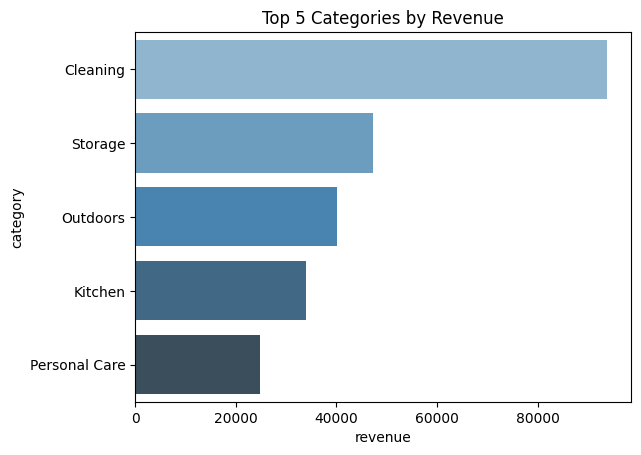

In [94]:
top_5_categories = merged_df.groupby('category')['revenue'].sum().nlargest(5).reset_index()

sns.barplot(x='revenue', y='category', data=top_5_categories, palette='Blues_d')
plt.title('Top 5 Categories by Revenue')

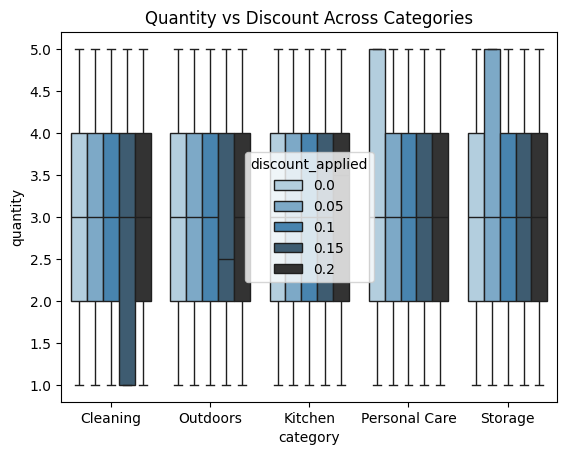

In [95]:
sns.boxplot(x='category', y='quantity', data=merged_df, hue='discount_applied', palette="Blues_d")
plt.title('Quantity vs Discount Across Categories')
plt.show()

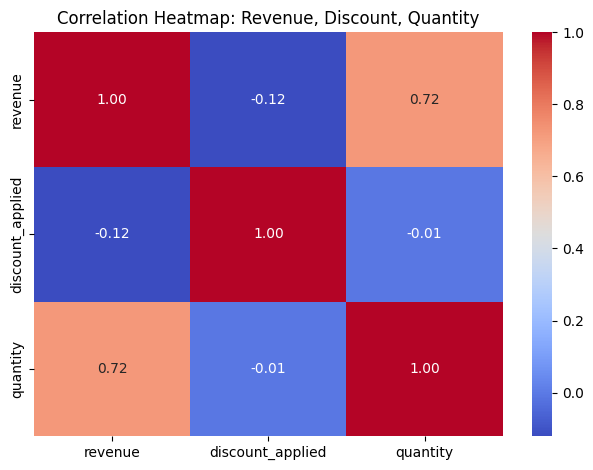

In [96]:
correlation = merged_df[['revenue', 'discount_applied', 'quantity']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Revenue, Discount, Quantity')
plt.tight_layout()
plt.show()

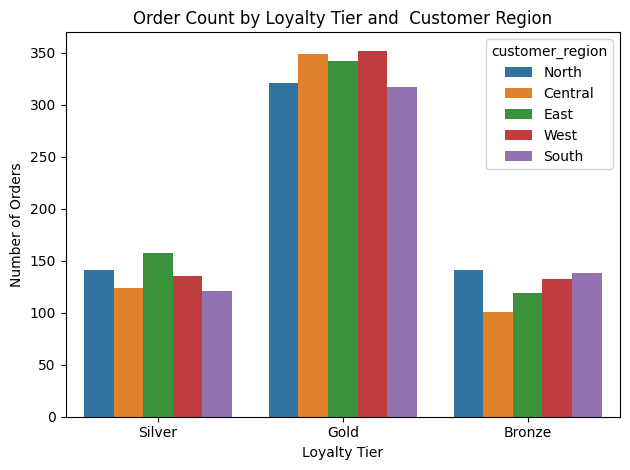

In [97]:
sns.countplot(data=merged_df, x='loyalty_tier', hue='customer_region')
plt.title('Order Count by Loyalty Tier and  Customer Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

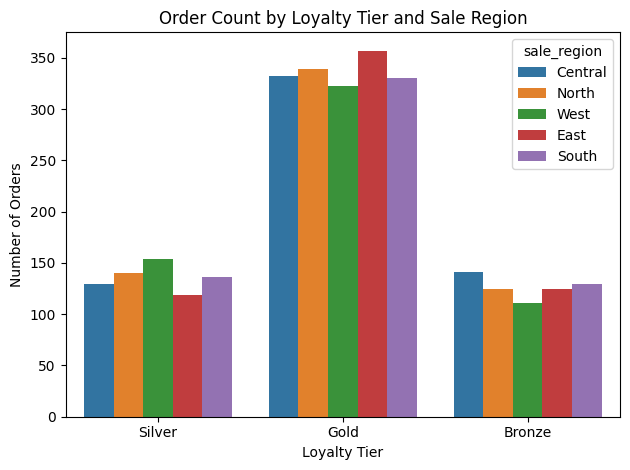

In [98]:
sns.countplot(data=merged_df, x='loyalty_tier', hue='sale_region')
plt.title('Order Count by Loyalty Tier and Sale Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [99]:
delivery_status_counts = merged_df.groupby(['price_band', 'delivery_status'])['order_id'].count().unstack()

delivery_status_counts

delivery_status,Cancelled,Delayed,Delivered
price_band,,,
High,262,545,581
Low,108,187,195
Medium,219,437,456


In [100]:
high = []
for row in delivery_status_counts.loc['High',:]:
    high.append(row)
print(f'High price band {high}')

medium = []
for row in delivery_status_counts.loc['Medium',:]:
    medium.append(row)
print(f'Medium price band {medium}')

low = []
for row in delivery_status_counts.loc['Low',:]:
    low.append(row)
print(f'Low price band {low}')

row_index = []
for i in delivery_status_counts.iloc[:,0].index:
    row_index.append(i)
print(f'Row Index {row_index}')

col_index = []
for j in delivery_status_counts.iloc[0,:].index:
    col_index.append(j)
print(f'Column Index {col_index}')

High price band [262, 545, 581]
Medium price band [219, 437, 456]
Low price band [108, 187, 195]
Row Index ['High', 'Low', 'Medium']
Column Index ['Cancelled', 'Delayed', 'Delivered']


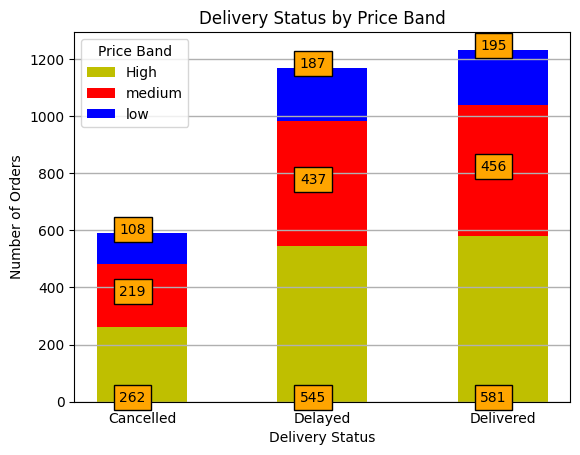

In [101]:
first = high
second = np.array(first) + np.array(medium)

elements_1 = plt.bar(col_index,high,width=0.5,color='y',label='High')
for element in elements_1:

    plt.text(element.get_x()+(element.get_width()/4) , element.get_y() , element.get_height(),
            bbox=dict(facecolor='orange',alpha=1))


elements_2 = plt.bar(col_index,medium,width=0.5,color='r',label='medium',bottom=first)
for element in elements_2:

    plt.text(element.get_x()+(element.get_width()/4) , element.get_y()+(element.get_height()/2) , element.get_height().round(2),
            bbox=dict(facecolor='orange',alpha=1))



elements_3 = plt.bar(col_index,low,width=0.5,color='b',label='low',bottom=second)
for element in elements_3:

    plt.text(element.get_x()+(element.get_width()/4) , element.get_y()+element.get_height() , element.get_height().round(2),
            bbox=dict(facecolor='orange',alpha=1))


plt.grid(axis = 'y',linewidth = 1)
plt.title('Delivery Status by Price Band')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.legend(title='Price Band')
plt.show()

**Business Questions**

In [102]:
merged_df.groupby(['category', 'sale_region'])['revenue'].sum().sort_values(ascending=False).reset_index()

,category,sale_region,revenue
0,Cleaning,East,20018.03
1,Cleaning,South,19058.91
2,Cleaning,North,18766.15
3,Cleaning,Central,18018.88
4,Cleaning,West,17952.89
5,Storage,West,10014.41
6,Storage,East,9604.38
7,Storage,Central,9489.27
8,Storage,South,9345.40
9,Outdoors,South,9327.43


In [103]:
# count of orders in each category by discount applied

merged_df.groupby(['category', 'discount_applied']).size().reset_index(name='order_count')\
          .sort_values(by=['category', 'discount_applied'], ascending=[True, False])

,category,discount_applied,order_count
4,Cleaning,0.20,213
3,Cleaning,0.15,195
2,Cleaning,0.10,214
1,Cleaning,0.05,195
0,Cleaning,0.00,386
9,Kitchen,0.20,58
8,Kitchen,0.15,62
7,Kitchen,0.10,58
6,Kitchen,0.05,74
5,Kitchen,0.00,150


In [104]:
merged_df.groupby('loyalty_tier')['revenue'].sum().sort_values(ascending=False)

,revenue
loyalty_tier,
Gold,137190.35
Silver,53385.33
Bronze,49393.02


In [105]:
merged_df.groupby(['sale_region', 'delivery_status'])['order_id'].count().unstack().fillna(0)

delivery_status,Cancelled,Delayed,Delivered
sale_region,,,
Central,125,235,242
East,98,251,252
North,117,236,251
South,116,230,249
West,133,217,238


In [106]:
merged_df.groupby(merged_df['signup_date'].dt.to_period('M').astype(str))['revenue'].sum()

,revenue
signup_date,
2024-07,17618.16
2024-08,25963.20
2024-09,18603.90
2024-10,22479.34
2024-11,22114.70
2024-12,20783.34
2025-01,17567.48
2025-02,24136.35
2025-03,19887.00


In [107]:
merged_df.groupby([merged_df['signup_date'].dt.to_period('M').astype(str), 'loyalty_tier']).size().unstack()

loyalty_tier,Bronze,Gold,Silver
signup_date,,,
2024-07,57.0,135.0,29.0
2024-08,56.0,203.0,44.0
2024-09,36.0,150.0,53.0
2024-10,53.0,149.0,73.0
2024-11,50.0,144.0,79.0
2024-12,48.0,184.0,44.0
2025-01,57.0,142.0,36.0
2025-02,61.0,156.0,66.0
2025-03,33.0,133.0,75.0


In [114]:
merged_df['signup_quarter'] = merged_df['signup_date'].dt.quarter

merged_df.query("signup_quarter == 2 and days_to_order <= 14 and discount_applied >= 0.20")

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter


In [115]:
merged_df.query("signup_quarter == 2")

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter
20,O216425,C00211,P0019,1.0,32.05,2025-07-06,Delayed,Bank Transfer,South,0.15,Kitchen Product 42,Kitchen,2024-07-17,30.30,S993,ingramjill@anderson-bell.com,2025-05-17,Male,North,Silver,27.24,27,High,354,anderson-bell.com,True,False,2
22,O930213,C00369,P0010,4.0,10.43,2025-07-06,Cancelled,PayPal,South,0.00,Cleaning Product 70,Cleaning,2024-08-14,17.72,S321,taylorkaren@yahoo.com,2025-06-27,Other,West,Bronze,41.72,27,Low,326,yahoo.com,False,False,2
32,O960238,C00259,P0009,2.0,9.58,2025-07-06,Delayed,Credit Card,East,0.20,Outdoors Product 13,Outdoors,2025-04-18,8.00,S695,ledwards@yahoo.com,2025-06-25,Female,West,Gold,15.33,27,Low,79,yahoo.com,True,False,2
33,O966135,C00464,P0028,1.0,26.29,2025-07-06,Cancelled,PayPal,West,0.00,Outdoors Product 53,Outdoors,2025-04-10,34.28,S587,mthomas@hotmail.com,2025-04-01,Male,Central,Gold,26.29,27,Medium,87,hotmail.com,False,False,2
34,O453905,C00398,P0017,2.0,32.10,2025-07-06,Delivered,PayPal,South,0.10,Personal Care Product 11,Personal Care,2024-12-16,16.46,S594,karamarks@hotmail.com,2025-06-15,Other,Central,Bronze,57.78,27,High,202,hotmail.com,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,O459090,C00199,P0013,5.0,44.93,2025-07-06,Delivered,Bank Transfer,Central,0.00,Cleaning Product 94,Cleaning,2025-06-17,36.52,S914,ashaw@gmail.com,2025-05-19,Female,East,Gold,224.65,27,High,19,gmail.com,False,False,2
2964,O605838,C00323,P0027,2.0,12.78,2025-07-06,Delivered,Credit Card,Central,0.15,Outdoors Product 55,Outdoors,2024-09-21,23.05,S127,francisco39@rhodes-fernandez.biz,2025-04-25,Other,South,Bronze,21.73,27,Low,288,rhodes-fernandez.biz,False,False,2
2973,O232325,C00421,P0006,1.0,47.34,2025-07-06,Delivered,Credit Card,West,0.05,Cleaning Product 16,Cleaning,2024-10-09,36.06,S980,samantha10@gonzalez.info,2025-05-16,Female,West,Gold,44.97,27,High,270,gonzalez.info,False,True,2
2979,O310112,C00392,P0008,1.0,45.88,2025-07-06,Delivered,PayPal,East,0.00,Storage Product 47,Storage,2024-08-29,31.96,S788,livingstonstacy@hunter-fuller.net,2025-04-29,Female,West,Gold,45.88,27,High,311,hunter-fuller.net,False,False,2


In [116]:
merged_df.query("days_to_order <= 14")

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter


In [117]:
merged_df.query("discount_applied >= 0.20")

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.2,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,27,High,356,gmail.com,False,True,3
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.2,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.10,27,High,136,hotmail.com,True,False,3
21,O121091,C00276,P0022,4.0,12.88,2025-07-06,Cancelled,credit card,Central,0.2,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,kevin90@yahoo.com,2025-03-16,Female,West,Gold,41.22,27,Low,275,yahoo.com,False,False,1
32,O960238,C00259,P0009,2.0,9.58,2025-07-06,Delayed,Credit Card,East,0.2,Outdoors Product 13,Outdoors,2025-04-18,8.00,S695,ledwards@yahoo.com,2025-06-25,Female,West,Gold,15.33,27,Low,79,yahoo.com,True,False,2
38,O508604,C00331,P0022,1.0,14.60,2025-07-06,Cancelled,Bank Transfer,Central,0.2,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,asmith@yahoo.com,2025-05-04,Female,West,Gold,11.68,27,Low,275,yahoo.com,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,O800056,C00185,P0015,3.0,27.55,2025-07-06,Delivered,PayPal,West,0.2,Storage Product 10,Storage,2024-08-08,39.21,S466,brittany58@gmail.com,2024-11-03,Male,East,Silver,66.12,27,Medium,332,gmail.com,False,False,4
2982,O834685,C00262,P0012,1.0,37.27,2025-07-06,Delivered,Bank Transfer,North,0.2,Cleaning Product 29,Cleaning,2025-04-19,14.67,S481,ann44@gmail.com,2025-02-13,Female,South,Gold,29.82,27,High,78,gmail.com,False,False,1
2984,O650396,C00298,P0005,2.0,21.88,2025-07-06,Delayed,Bank Transfer,Central,0.2,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559,melissaturner@hotmail.com,2024-08-31,Female,East,Bronze,35.01,27,Medium,259,hotmail.com,True,False,3
2985,O868860,C00233,P0001,5.0,43.40,2025-07-06,Delivered,Bank Transfer,West,0.2,Storage Product 39,Storage,2025-03-11,15.88,S339,ryanbartlett@guerra.com,2024-11-01,Other,Central,Silver,173.60,27,High,117,guerra.com,False,False,4


In [121]:
# minmax scalar
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

merged_df['normalized_revenue'] = scalar.fit_transform(merged_df[['revenue']])

merged_df['normalized_base_price'] = scalar.fit_transform(merged_df[['base_price']])

merged_df['normalized_unit_price'] = scalar.fit_transform(merged_df[['unit_price']])

In [123]:
# label encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

merged_df['encoded_gender'] = encoder.fit_transform(merged_df['gender'])

merged_df['encoded_delivery_status'] = encoder.fit_transform(merged_df['delivery_status'])

merged_df['encoded_payment_method'] = encoder.fit_transform(merged_df['payment_method'])

merged_df['encoded_loyalty_tire'] = encoder.fit_transform(merged_df['loyalty_tier'])

In [124]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter,normalized_revenue,normalized_base_price,normalized_unit_price,encoded_gender,encoded_delivery_status,encoded_payment_method,encoded_loyalty_tire
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27,High,275,mills-logan.com,False,False,3,0.457431,0.413221,0.744225,0,2,2,2
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,credit card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.60,27,Medium,169,morgan.com,True,True,3,0.361987,0.904316,0.260062,2,1,3,1
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,27,Medium,103,walters-smith.com,False,False,3,0.075984,0.150921,0.516313,1,2,0,1
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,27,High,356,gmail.com,False,True,3,0.080025,0.055539,0.589664,0,0,1,1
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.10,27,High,136,hotmail.com,True,False,3,0.129046,0.622698,0.943558,1,1,1,1


In [125]:
# onehot encoding

merged_df_encoded = pd.get_dummies(merged_df, columns=['category', 'customer_region'], drop_first=True)

In [128]:
merged_df_encoded.drop(columns=['revenue', 'base_price', 'unit_price', 'delivery_status', 'payment_method', 'sale_region', 'loyalty_tier'])

merged_df_encoded.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sale_region,discount_applied,product_name,launch_date,base_price,supplier_code,email,signup_date,gender,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,same_region,signup_quarter,normalized_revenue,normalized_base_price,normalized_unit_price,encoded_gender,encoded_delivery_status,encoded_payment_method,encoded_loyalty_tire,category_Kitchen,category_Outdoors,category_Personal Care,category_Storage,customer_region_East,customer_region_North,customer_region_South,customer_region_West
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00,Cleaning Product 86,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,Silver,117.75,27,High,275,mills-logan.com,False,False,3,0.457431,0.413221,0.744225,0,2,2,2,False,False,False,False,False,True,False,False
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,credit card,North,0.00,Outdoors Product 32,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,Gold,94.60,27,Medium,169,morgan.com,True,True,3,0.361987,0.904316,0.260062,2,1,3,1,False,True,False,False,False,True,False,False
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Gold,25.23,27,Medium,103,walters-smith.com,False,False,3,0.075984,0.150921,0.516313,1,2,0,1,True,False,False,False,False,False,False,False
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Gold,26.21,27,High,356,gmail.com,False,True,3,0.080025,0.055539,0.589664,0,0,1,1,False,False,False,False,False,False,False,False
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.20,Cleaning Product 53,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Gold,38.10,27,High,136,hotmail.com,True,False,3,0.129046,0.622698,0.943558,1,1,1,1,False,False,False,False,False,False,False,False
